In [9]:
import skimage.io
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import time
# import imagecodecs
import imageio
from PIL import Image
from scipy import ndimage
import matplotlib.patches as patches # for drawing the rectangles on the field image
import os

# read image for potato June 22, 2020
# root_folder = "E:/data/remote_sensing/2020/"
# D:\data\remote_sensing\Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance
root_folder = "C:/data/remote_sensing/"
project_stub = "Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance"

# export path for image files
export_path = os.path.join(root_folder, (project_stub + '/export/'))
  
# Create the directory if it doesn't already exist
try: 
    os.mkdir(export_path)
    print(f"Created: {export_path}")
except:
    print(f"Already exists: {export_path}")


# define float to int functions
def convert_float_to_int(file_path):
    


    image = cv.imread(file_path, cv.IMREAD_UNCHANGED)
    # print(np.min(float_image), np.max(float_image))
    # image = np.array(float_image * 255., dtype=np.uint8)
    # print(np.min(image), np.max(image))

    return image

# rotates an image, then returns a cropped image
def rotate_and_crop(img, rot_angle, y_limits, x_limits):
    # rotate then take the subset for our crop
    return ndimage.rotate(img, angle = rot_angle)[y_limits[0]:y_limits[1], x_limits[0]:x_limits[1]]

    

Already exists: C:/data/remote_sensing/Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance/export/


In [2]:
# import all the wavelengths
blue = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_blue.tif")
blue_444 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_blue-444.tif")
green = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_green.tif")
green_531 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_green-531.tif")
red = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red.tif")
red_650 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red-650.tif")
nir = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_nir.tif")
red_edge = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge.tif")
red_edge_705 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge-705.tif")
red_edge_740 = convert_float_to_int(root_folder + project_stub + "/" + project_stub + "_red edge-740.tif")


    



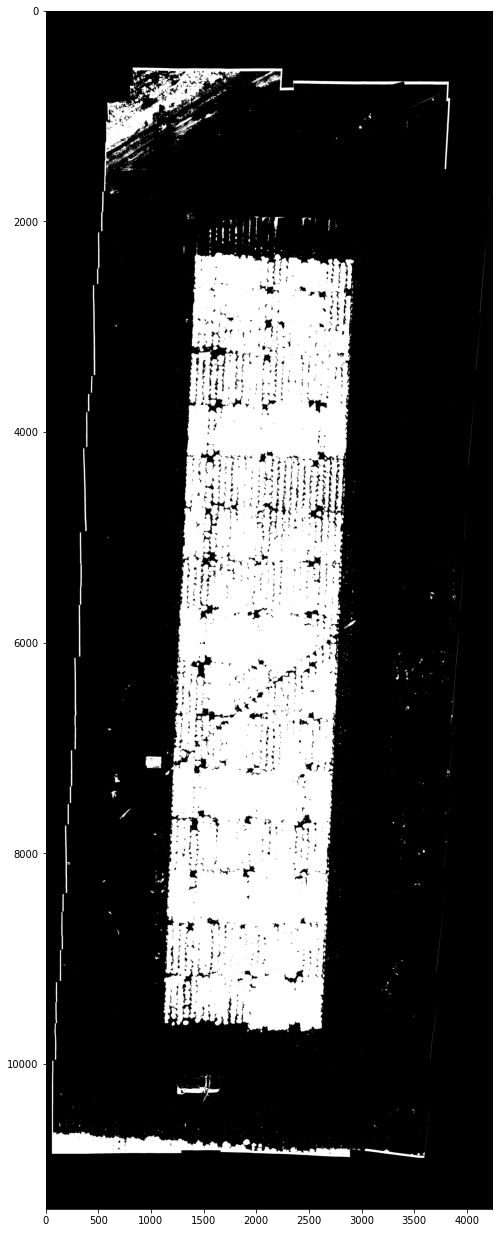

In [11]:
# show the uncropped image
rot_angle = 180
y_limits = [0, red.shape[0]]
x_limits = [0, red.shape[1]]

red_crop = rotate_and_crop(red, rot_angle, y_limits, x_limits)
nir_crop = rotate_and_crop(nir, rot_angle, y_limits, x_limits)

ndvi = (nir_crop - red_crop)/(nir_crop + red_crop)

ndvi_mask = np.where(ndvi>0.3, 1, 0)

# show the fig
plt.figure(figsize = (8,30))
plt.imshow(ndvi_mask, cmap="gray")
plt.savefig(export_path + 'uncropped_ndvi_mask.png')

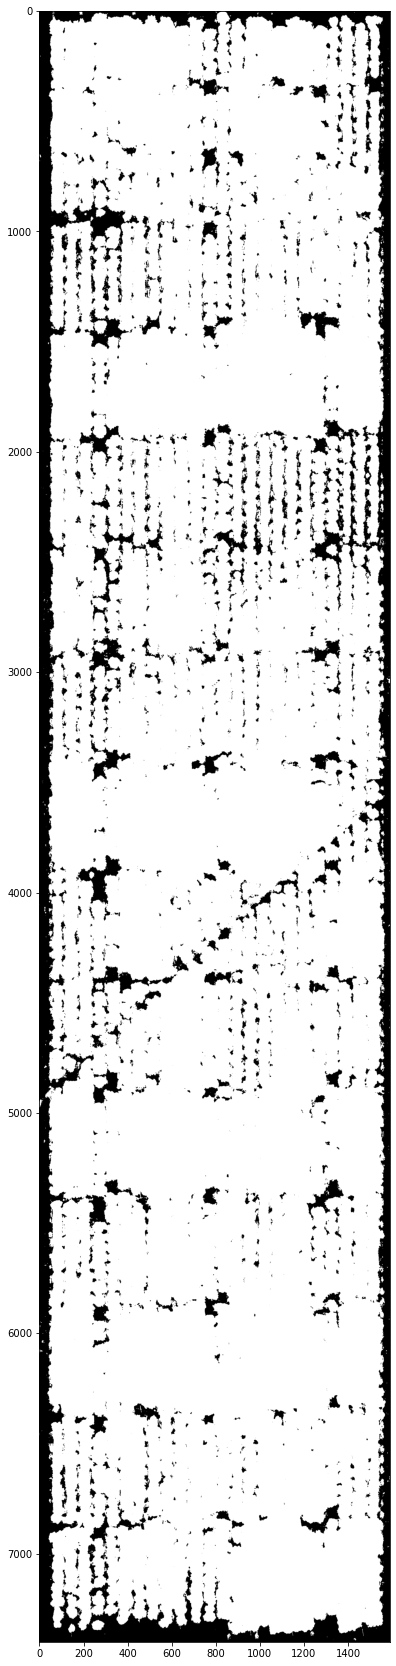

In [12]:
# definte the rotation angle and the desired field crop dimensions to isolate our region of interest
rot_angle = 182.4
y_limits = [2400, 9800]
x_limits = [1460, 3050]

# rotate and crop our red and nir bands
red_crop = rotate_and_crop(red, rot_angle, y_limits, x_limits)
nir_crop = rotate_and_crop(nir, rot_angle, y_limits, x_limits)

# calculate NDVI
ndvi = (nir_crop - red_crop)/(nir_crop + red_crop)

# use the NDVI image to create a mask
ndvi_mask = np.where(ndvi>0.3, 1, 0)

# # show NDVI
# plt.figure(figsize = (8,30))
# plt.imshow(ndvi, cmap="gray")
# plt.savefig('ndvi.png')

# show the mask
plt.figure(figsize = (8,30))
plt.imshow(ndvi_mask, cmap="gray")
plt.savefig(export_path + 'ndvi_mask.png')

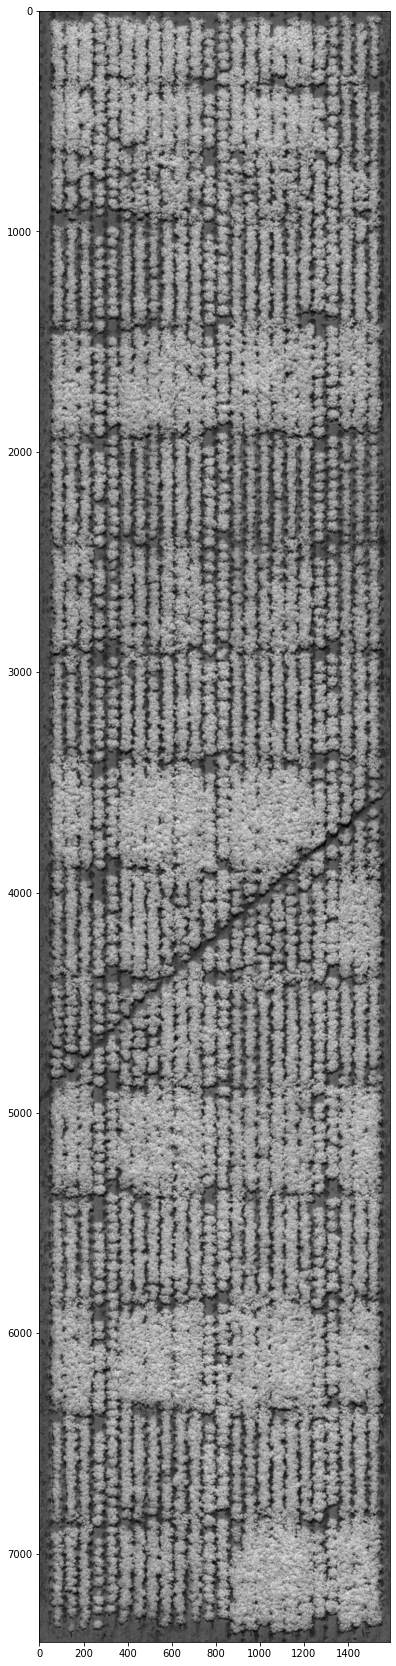

In [13]:
# show the red data
plt.figure(figsize = (8,30))
plt.imshow(nir_crop, cmap="gray")
plt.savefig(export_path + 'nir_crop.png')

In [6]:


# create a hypercube of all the layers
channels = [blue, blue_444, green, green_531, red, red_650, nir, red_edge, red_edge_705, red_edge_740]
field_image = np.zeros(shape=(red_crop.shape[0], red_crop.shape[1], len(channels)))

# rotate all the images and crop them and create the field_image hypercube of just cropped/rot image channels
for i in range(0, len(channels)):
    field_image[:,:,i] = rotate_and_crop(channels[i], rot_angle, y_limits, x_limits)
    



field_image.shape[0]: 7400, nir_crop.shape[0]: 7400
expected 13 range x 6 rows = 78 total plots, actual plots: 78


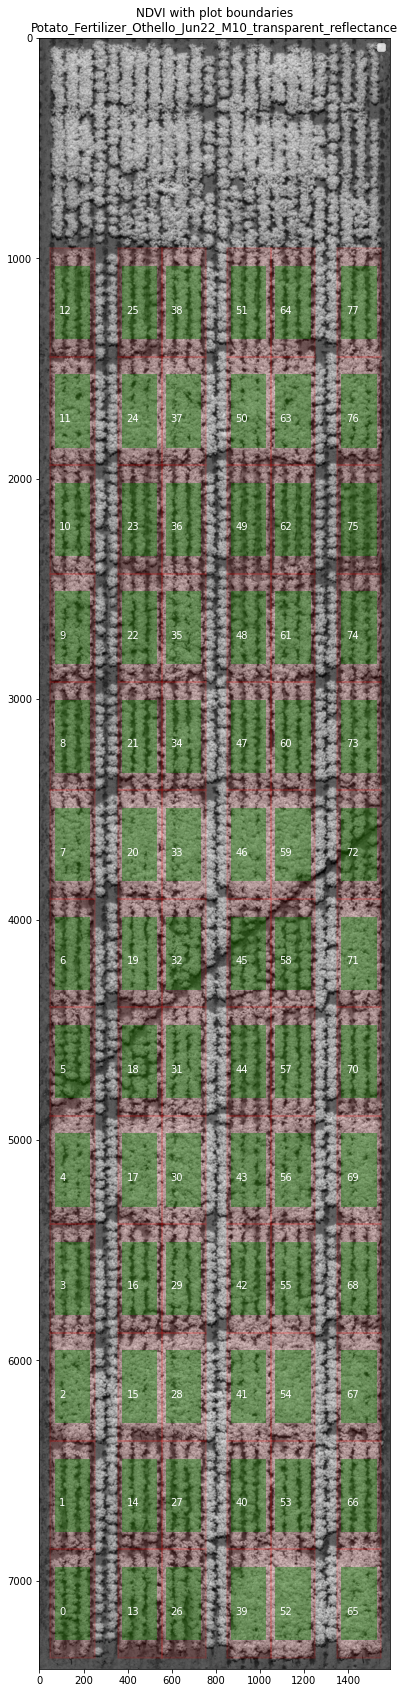

In [14]:
plot_height = 492
plot_width = 200
x_origins = [50, 355, 555, 850, 1050, 1350]
# x_origins = [1350, 1050, 850, 535, 335, 50] # RIGHT TO LEFT
y_origin = field_image.shape[0] - plot_height - 50

print(f"field_image.shape[0]: {field_image.shape[0]}, nir_crop.shape[0]: {nir_crop.shape[0]}")
edge_buf = 40


# define field image and subplots
figure, ax = plt.subplots(1, figsize=(8,30))

# Displays an image
ax.imshow(nir_crop, cmap="gray")
# ax.set_xlabel('time (s)')
ax.set_title('NDVI with plot boundaries\n' + project_stub)
plt.gca().legend(('plot border', 'plot region of interest'))
# ax.set_ylabel('Undamped')
i = 0
# add rectangle patches to image
for x_coord in x_origins:
    for range_y in range(0, 13):
        current_point = (x_coord, y_origin - range_y * plot_height)
        
        # find the center of the plot for a text label
        plot_center = (current_point[0] + .5 * plot_width, current_point[1] + .5 * plot_height)
        # 
        rect_line = patches.Rectangle((current_point[0], current_point[1]), plot_width, plot_height, edgecolor='r', lw=2, facecolor="r", alpha=.1)
        ax.add_patch(rect_line)

        rect_fill  = patches.Rectangle(xy=(current_point[0] + .5 * edge_buf, current_point[1] + 2*edge_buf),
                                        width=(plot_width - edge_buf), 
                                        height=(plot_height - 4* edge_buf), 
                                        edgecolor='None', 
                                        facecolor="green", 
                                        alpha=.4)
        # show plot ID on the map
        ax.text(plot_center[0] - .3 * plot_width, plot_center[1] + .1 * plot_height, i, c='white')
        i += 1 # increment after, so we start with zero and end with total number of plots
        ax.add_patch(rect_fill)

plt.savefig(export_path + "plot_map_boundaries.png")    

print(f"expected 13 range x 6 rows = 78 total plots, actual plots: {i}")

In [8]:
print(export_path)


D:/data/remote_sensing/Potato_Fertilizer_Othello_Jun22_M10_transparent_reflectance/export/


In [ ]:
# 11' plots on bottom
# 24 rows, 3 ranges of 11' tall, 13' with borders




# working field image
field_y, field_x, _ = field_image.shape
plot_row = 16
plot_col = 24
plot_width = int(field_x / plot_col)
plot_height = int(field_y / plot_row)
xy_begin = (0, 2)
print(f"plot_width: {plot_width}, plot_height: {plot_height}")


channel_dict = {'blue': 0, 'blue_444': 1, 'green': 2, 'green_531': 3, 'red': 4, 'red_650': 5, 'nir': 6, 'red_edge': 7, 'red_edge_705': 8, 'red_edge_740': 9}

indices = []

for i, v in channel_dict.items():
    current_channel = channel_dict[i]
    for j, b in channel_dict.items():
        index_combo = (current_channel, channel_dict[j])
        if index_combo not in indices and (index_combo[1] - index_combo[0] != 0):
            indices.append((current_channel, channel_dict[j]))
        
    




In [ ]:
# import the plot map
import pandas as pd
# E:\data\remote_sensing\2020\Bean_Othello_Jul21_M10_transparent_reflectance
plot_map = pd.read_csv("E:/data/remote_sensing/2020/Bean_Othello_Jul21_M10_transparent_reflectance/Bean_Othello_Jul21_M10_plotmap.csv")

# # import the ground truth data
ground_truth = pd.read_csv("E:/data/remote_sensing/2020/Bean_Othello_Jul21_M10_transparent_reflectance/Bean_Othello_Jul21_M10_groundtruth.csv")
# pandas, first number is row counting from above, second number is column
# print(plot_map.iloc[1, 0])
# print("plot width: ", plot_width, "plot_height: ", plot_height)
# print("xy_begin", xy_begin)

# find the center points of our plots
current_point = xy_begin

# create our plot index
plot_index = 0
df = pd.DataFrame(columns=['plot_id', 'coords'])

# create all our indices
# img_masked
img_indices = np.zeros(shape=(field_image.shape[0], field_image.shape[1], 100))
print(img_indices.shape, "is the img_indices shape")


# # calculate the indices and store them in the img_indices
for i, idx in enumerate(indices):     
    # choose bands
    band1 = field_image[:, :, idx[0]]
    band2 = field_image[:, :, idx[1]]
    
    # calculate the index
    current_index = np.divide(np.subtract(band1, band2), np.add(band1, band2))
    
    # mask the index
    img_indices[:,:, i] = np.multiply(current_index, ndvi_mask)
    
# calculate all of the plot id and plot origin points, and add them to our data frame
for row in range(0, plot_row):
    for col in range(0, plot_col):
            # plot_id for merging later, get from plot map document
            plot_id = plot_map.iloc[row, col + 1]
            plot_index += 1
            
            # find the upper left origin
            current_point = (xy_begin[0] + row * plot_height, xy_begin[1] + col * plot_width)

            # add this to the dataframe
            df = df.append({'plot_id': plot_id,'coords': current_point},ignore_index=True)
    
# # plot ndvi to check that our indices work and that our plots are correct
# define field image and subplots
img = img_indices[:,:,50]
figure, ax = plt.subplots(1, figsize=(5,30))

# Displays an image
ax.imshow(img, cmap="gray")
# ax.set_xlabel('time (s)')
ax.set_title('NDVI with plot boundaries')

# ax.set_ylabel('Undamped')

# add rectangle patches to image
for coord in df['coords']:
    rect = patches.Rectangle((coord[1],coord[0]),plot_width,plot_height, edgecolor='r', facecolor="none")
    ax.add_patch(rect)



    
    
plt.savefig(export_dir + "plot_map_boundaries.png")    

    
    
# populate the data frame with some mean values of the plots at each index
# TODO figure out the whole extraction and saving data thing
#               # create the plot roi
#             roi_crop = img_indices[current_point[0]:current_point[0] + plot_height, 
#                                    current_point[1]:current_point[1]+plot_width, 
#                                    :]
            
            
# for i, index in enumerate(indices):
#     mean_plot_value = np.mean(roi_crop[:,:,i])
#     df = df.append({str(index): index,
#                     (str(index)+"_mean"): mean_plot_value
#                    }, ignore_index=True)

# 







            
            

# # # merge our extracted features to the ground truth data
df = pd.merge(df,ground_truth,on='plot_id')
print(df.head)
# # print("Time elapsed: ", time.time() - start_time)

In [ ]:

my_dict = {'plot_id': df['plot_id']}

# iterate through all the indices

for i, index in enumerate(indices):
    plot_id = []
    mean_list = []
    median_list = []
    std_list = []
    min_list = []
    max_list = []
        
    # iterate through the set of coordinates, and select the region of interest to calculate parameters
    for j, coords in enumerate(df['coords']):
        
        roi = img_indices[coords[0]:coords[0] + plot_height, coords[1]:coords[1]+plot_width, i]
           
        # mean intensity
        mean_list.append(np.mean(roi))
        
        # median intensity
        median_list.append(np.median(roi))
        
        # standard deviation
        std_list.append(np.std(roi)) 
        
        # min intensity
        min_list.append(np.min(roi))
        
        # max intensity
        max_list.append(np.max(roi))
        

    # add the index lists into dictionary
    my_dict[(str(i) + "_mean").strip()] = mean_list
    my_dict[(str(i) + "_med").strip()] = median_list
    my_dict[(str(i) + "_std").strip()] = std_list
    my_dict[(str(i) + "_min").strip()] = min_list
    my_dict[(str(i) + "_max").strip()] = max_list


# now take that dictionary, turn it into a data frame
df2 = pd.DataFrame.from_dict(my_dict)

# take all the columns in df2 and add them into our original data frame
for col in df2.columns:
    df[col] = df2[col]
    
# take a look at it
print(df.head)

# save it to disk
df.to_csv((project_stub + '_hyperindices.csv').strip())